# Final project (Data Vizualization)

## Sources 

State government expenditures for R&D, by state: FYs 2006–15
local file : expenditures_state.xlsx

State Patenting Breakout by Regional Component, Count of 2000 - 2015 Utility Patent Grants
https://www.uspto.gov/web/offices/ac/ido/oeip/taf/countyall/usa_county_gd.htm


In [225]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

In [2]:
# Load patents data
patents = pd.read_csv("patents.csv", sep=";", 
                      usecols=[0, 1, 2, 3, 14, 15, 16, 17, 18, 19], 
                      names=["FIPS", "STATE", "STATE_NAME", "COUNTY", "2010", "2011", "2012", "2013", "2014", "2015"],
                      header=0)
patents.head()

,FIPS,STATE,STATE_NAME,COUNTY,2010,2011,2012,2013,2014,2015
0,6085,CA,CALIFORNIA,Santa Clara County,10047,10221,11490,12855,14847,14571
1,6073,CA,CALIFORNIA,San Diego County,2993,3293,4010,4805,5400,5460
2,6037,CA,CALIFORNIA,Los Angeles County,2817,2844,3304,3550,3716,3625
3,53033,WA,WASHINGTON,King County,3637,3157,3663,3886,4291,4155
4,6081,CA,CALIFORNIA,San Mateo County,2664,2695,3066,3543,3984,3985


In [3]:
# Load expenditures
expenditures = pd.read_excel("expenditures_state.xlsx", skiprows=5, 
                             usecols=[0, 5, 6, 7, 8, 9, 10])

expenditures.columns = ["STATE_NAME", "2010", "2011", "2012", "2013", "2014", "2015"]
expenditures.head()

,STATE_NAME,2010,2011,2012,2013,2014,2015
0,Alabama,15113917.0,19684063.0,17352984.0,13292741.0,18532534.0,24486963.0
1,Alaska,9274800.0,11349400.0,5467944.0,6689384.0,12031675.0,11258203.0
2,Arizona,17682315.0,18626577.0,22809895.0,27810970.0,18820149.0,14942124.0
3,Arkansas,14446084.0,14705327.0,15518374.0,16518947.0,14994903.0,16642711.0
4,California,328982383.0,407616001.0,401522758.0,346942036.0,321958885.0,500071595.0


In [4]:
# Data Cleaning (expenditures)
expenditures['STATE_NAME'] = expenditures['STATE_NAME'].str.upper()
expenditures.head()

,STATE_NAME,2010,2011,2012,2013,2014,2015
0,ALABAMA,15113917.0,19684063.0,17352984.0,13292741.0,18532534.0,24486963.0
1,ALASKA,9274800.0,11349400.0,5467944.0,6689384.0,12031675.0,11258203.0
2,ARIZONA,17682315.0,18626577.0,22809895.0,27810970.0,18820149.0,14942124.0
3,ARKANSAS,14446084.0,14705327.0,15518374.0,16518947.0,14994903.0,16642711.0
4,CALIFORNIA,328982383.0,407616001.0,401522758.0,346942036.0,321958885.0,500071595.0


In [5]:
# Compute total of patents by states
gb_patents_by_state = patents.groupby(["STATE", "STATE_NAME"])["2010", "2011", "2012", "2013", "2014", "2015"].sum()
# Clear out the groupby
patents_by_state = gb_patents_by_state.reset_index()
patents_by_state.head()

,STATE,STATE_NAME,2010,2011,2012,2013,2014,2015
0,AK,ALASKA,30,28,28,46,51,41
1,AL,ALABAMA,448,353,416,504,504,478
2,AR,ARKANSAS,144,134,178,160,204,233
3,AZ,ARIZONA,1977,2072,2210,2226,2520,2541
4,CA,CALIFORNIA,27335,28141,32085,36186,40631,40137


In [6]:
exp_patents = pd.merge(patents_by_state, expenditures, on="STATE_NAME")

exp_patents.columns = ["STATE", "STATE_NAME", 
                       "PATENT_2010", "PATENT_2011", "PATENT_2012", "PATENT_2013", "PATENT_2014", "PATENT_2015",
                       "EXP_2010", "EXP_2011", "EXP_2012", "EXP_2013", "EXP_2014", "EXP_2015"]

# Compute the price per patent
for year in range(2010, 2016):
    str_year = str(year)
    exp_patents["EXP_PAT_" + str_year] = exp_patents["EXP_" + str_year] / exp_patents["PATENT_" + str_year]


exp_patents.head()

,STATE,STATE_NAME,PATENT_2010,PATENT_2011,PATENT_2012,PATENT_2013,PATENT_2014,PATENT_2015,EXP_2010,EXP_2011,EXP_2012,EXP_2013,EXP_2014,EXP_2015,EXP_PAT_2010,EXP_PAT_2011,EXP_PAT_2012,EXP_PAT_2013,EXP_PAT_2014,EXP_PAT_2015
0,AK,ALASKA,30,28,28,46,51,41,9274800.0,11349400.0,5467944.0,6689384.0,12031675.0,11258203.0,309160.000000,405335.714286,195283.714286,145421.391304,235915.196078,274590.317073
1,AL,ALABAMA,448,353,416,504,504,478,15113917.0,19684063.0,17352984.0,13292741.0,18532534.0,24486963.0,33736.421875,55762.218130,41713.903846,26374.486111,36770.900794,51227.956067
2,AR,ARKANSAS,144,134,178,160,204,233,14446084.0,14705327.0,15518374.0,16518947.0,14994903.0,16642711.0,100320.027778,109741.246269,87181.876404,103243.418750,73504.426471,71427.944206
3,AZ,ARIZONA,1977,2072,2210,2226,2520,2541,17682315.0,18626577.0,22809895.0,27810970.0,18820149.0,14942124.0,8944.013657,8989.660714,10321.219457,12493.697215,7468.313095,5880.410862
4,CA,CALIFORNIA,27335,28141,32085,36186,40631,40137,328982383.0,407616001.0,401522758.0,346942036.0,321958885.0,500071595.0,12035.206987,14484.773142,12514.344959,9587.742110,7923.971475,12459.117398


In [160]:
# All states data 
graph_data = exp_patents[["STATE_NAME", "EXP_PAT_2010", "EXP_PAT_2011", "EXP_PAT_2012", "EXP_PAT_2013", "EXP_PAT_2014", "EXP_PAT_2015"]]
graph_data.columns = ["STATE_NAME", "2010", "2011", "2012", "2013", "2014", "2015"]

# California-specific
california_data = graph_data[ graph_data["STATE_NAME"] == "CALIFORNIA" ][["2010", "2011", "2012", "2013", "2014", "2015"]]

graph_data = graph_data.set_index(["STATE_NAME"])

# Average USA
average_USA = pd.DataFrame(data=graph_data[["2010", "2011", "2012", "2013", "2014", "2015"]].mean(), columns=["Average USA"])

california_data = pd.DataFrame(data=california_data[["2010", "2011", "2012", "2013", "2014", "2015"]].mean(), columns=["California"])

graph_data = graph_data.T
bpp = graph_data.T.reset_index()

# Preparing Santa Clara specific data

california_patents = patents[patents['STATE_NAME'] == 'CALIFORNIA']

sc_county = california_patents[ california_patents['COUNTY'] == 'Santa Clara County'] 

sum_2010 = california_patents['2010'].sum()
sum_2011 = california_patents['2011'].sum()
sum_2012 = california_patents['2012'].sum()
sum_2013 = california_patents['2013'].sum()
sum_2014 = california_patents['2014'].sum()
sum_2015 = california_patents['2015'].sum()


data = [(sc_county['2010'] / sum_2010)[0],
        (sc_county['2011'] / sum_2011)[0],
        (sc_county['2012'] / sum_2012)[0],
        (sc_county['2013'] / sum_2013)[0],
        (sc_county['2014'] / sum_2014)[0],
        (sc_county['2015'] / sum_2015)[0]]


pd_sc = pd.DataFrame(data=data, columns=["SANTA CLARA"])
pd_sc['REM'] = 1 - pd_sc["SANTA CLARA"]
pd_sc = pd_sc.T
pd_sc.columns = [ '2010', '2011', '2012', '2013', '2014', '2015']


2010    0.367551
2011    0.363207
2012    0.358111
2013    0.355248
2014    0.365411
2015    0.363032
Name: SANTA CLARA, dtype: float64

<IPython.core.display.Javascript object>


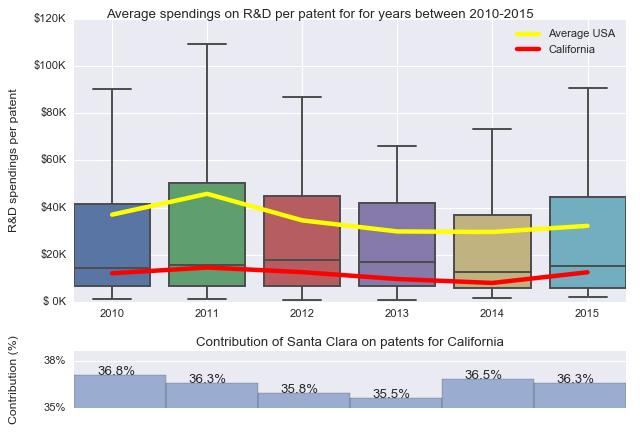

In [347]:
plt.figure()

# Create Gridspec
gs = gridspec.GridSpec(2,1 , height_ratios=[5,1])

# Main plot
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Printing data
sns.boxplot(ax=ax1, data=bpp[['2010', '2011', '2012', '2013', '2014', '2015']], showfliers=False)
average_USA.plot(ax=ax1, color='yellow', linewidth=4.0)
california_data.plot(ax=ax1, color='red', linewidth=4.0)
#ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.0f'))
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:2.1f}%'.format(x) for x in vals])


ax1.set_ylabel('R&D spendings per patent')
ax1.get_yaxis().set_label_coords(-0.1,0.5)
plt.suptitle('Average spendings on R&D per patent for for years between 2010-2015')

plt.bar(np.arange(len(['2010', '2011', '2012', '2013', '2014', '2015'])), pd_sc.iloc[0], width=1, alpha=0.5)
vals = ax1.get_yticks()
ax1.set_yticklabels(["${:2.0f}K".format(x/1000) for x in vals])

major_ticks = np.arange(0.35,0.38, 0.025) 
ax2.set_ylim([0.35,0.38])
ax2.set_yticks(major_ticks)   
ax2.set_ylabel('Contribution (%)')
ax2.get_yaxis().set_label_coords(-0.1,0.5)
ax2.set_title('Contribution of Santa Clara on patents for California')

vals = ax2.get_yticks()
ax2.set_yticklabels(["{:2.0f}%".format(x*100) for x in vals])
ax2.xaxis.set_visible(False)

for a,b in zip(np.arange(len(['2010', '2011', '2012', '2013', '2014', '2015'])), pd_sc.iloc[0]):
    plt.text(a + 0.25, b, '{:2.1f}%'.format(b*100))


plt.tight_layout()
plt.show()